<a href="https://colab.research.google.com/github/priyaregit/EDA_Hotel-Booking/blob/main/Hotel_Booking_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Pandas and Numpy libraries for the purpose of data analysis
import pandas as pd
import numpy as np

# Importing Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Importing warnings library to filter some warnings
import warnings
warnings.filterwarnings("ignore")

### Let us first read the dataset from Google drive

In [4]:
# Reading the dataset from Google drive and storing it in the dataframe: hotel_booking

hotel_booking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/EDA/Data/Hotel Bookings.csv')

### We must perform some basic checks on the dataset such as:

* ### Checking the shape of dataframe i.e. number of rows and columns

* ### Checking for the various variables/features of our dataset

* ### Checking the data type of each of the features

* ### Checking for the missing values/ null values

### These checks would give us a baseline understanding of the available data

In [ ]:
# Having a look at the first 5 rows/observations from our data

hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking the last 3 rows from the data

hotel_booking.tail(3)   

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Checking the number of rows and columns in the dataset

hotel_booking.shape

(119390, 32)

### There are 119,390 rows and 32 columns in the dataset

In [ ]:
# Checking for information such as missing values and data type of all the columns 

hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### We find that there are 4 columns- children, country, agent and company- with missing/null values. We will deal with the issue of missing values a little later.

### We also find that our data is of object, integer and float data types.

### There are 20 columns with numeric data (integer and float data type) and 12 columns with categorical data. 

### However, on closer observation, we notice that the column 'reservation_status_date' which contains dates, is of object data type. We need to change its data type


In [5]:
# Importing datetime module 
from datetime import datetime

# Converting data type of the column 'reservation_status_date' from object to datetime
hotel_booking['reservation_status_date'] =  pd.to_datetime(hotel_booking['reservation_status_date'], format="%Y-%m-%d")

### Let us now have a quick statistical inspection of the numeric data

In [ ]:
# Checking the key statistics of the all the columns with numeric data

hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Some inferences that we can draw from the above statistics are:

### * The average lead time is 104 days with the maximum being 737 days.

### * There could be outliers in columns such as 'previous_cancellations',	'previous_bookings_not_canceled' and 'booking_changes'

### * The mean 'adr' is 101.83

### * The mean of 'days_in_waiting_list' is 2.32 days. However, the maximum waitlist period is 391 days

### We would get a clearer picture of the hotel booking data through data exploration and visualisation of all the individual statistics.

## <b> Data Dictionary

### To assist in data exploration, let us create a Data Dictionary

### First, we need to find the unique values present in all the columns containing categorical data.

In [62]:
# Creating a list of all the column names
column_names = list(hotel_booking.columns)


# Running a 'for' loop across all the 32 columns and printing the 'unique' values 'if' the column is of object data type
for i in range(len(hotel_booking.columns)):                  

  if hotel_booking.dtypes[column_names[i]] == 'object':    

    print(f"The unique values for {column_names[i]} are: {list(hotel_booking[column_names[i]].unique())}", end = '\n\n')
    

The unique values for hotel are: ['Resort Hotel', 'City Hotel']

The unique values for arrival_date_month are: ['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']

The unique values for meal are: ['BB', 'FB', 'HB', 'SC', 'Undefined']

The unique values for country are: ['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Unknown', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN

In [ ]:
def uni_val(x,y):
  a = x.unique()
  b = print(f"The unique values {y} are: {a}")
  return b
  

In [ ]:
# Creating a list of all the column names

column_names = list(hotel_booking.columns)


# Running a 'for' loop across all the 32 columns and printing the 'unique' values 'if' the column is of object data type

for i in range(len(hotel_booking.columns)):                  

  if hotel_booking.dtypes[column_names[i]] == 'object':

    uni_val(hotel_booking[column_names[i]],column_names[i])
    print()

The unique values hotel are: ['Resort Hotel' 'City Hotel']

The unique values arrival_date_month are: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

The unique values meal are: ['BB' 'FB' 'HB' 'SC' 'Undefined']

The unique values country are: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER'

### Now that we know the unique labels in each of the categorical columns, let us understand the information contained in all the columns through a Data Dictionary.

###  The various columns are as follows:

### 1 hotel: It provides information about the type of hotel booked. There are two types of hotels- Resort Hotel and City Hotel

### 2 is_canceled: It indicates if the booking was cancelled. It assigns the value of 1 if the booking is cancelled, else it is assigned 0

### 3 lead_time: It gives the number of days that elapsed between the date of  booking and the arrival date of the guests

### 4 arrival_date_year: It gives the year of the guest's arrival date. We have data for the years 2015, 2016 and 2017

### 5 arrival_date_month: It is a categorical value that gives the month of the guest's arrival date with 12 categories- “January” to “December”

### 6 arrival_date_week_number:	It gives the number of the week of the guest's arrival date. It could range from 1 to 53

### 7 arrival_date_day_of_month: It gives the day of the month on which the guest's arrive. It could range from 1 to 31

### 8 stays_in_weekend_nights: It indicates the number of weekend nights (Saturday or Sunday) that the guests stayed or booked to stay at the hotel

### 9 stays_in_week_nights: It indicates the number of week nights (Monday to Friday) that the guests stayed or booked to stay at the hotel

### 10 adults: It shows the number of adults who were booked for a stay at the hotel

### 11 children: It shows the number of children (age group not indicated) who were booked for a stay at the hotel

### 12 babies: It shows the number of babies (age group not indicated) who were booked for a stay at the hotel

### 13 meal: It is a categorical variable that indicates the type of meal booked. Categories present (in accordance with standard hospitality meal packages) are:

 * ### BB – Bed & Breakfast
 * ### HB – Half Board (breakfast and one other meal)
 * ### FB – Full Board (breakfast, lunch and dinner)
 * ### SC/Undefined – no meal package

### 14 country: It indicates the guest's country of origin

### 15 market_segment: It is the designation of the market segment through which the booking was made. The various categories are: Direct, Corporate, Online TA, Offline TA/TO, Complementary, Groups, Aviation and Undefined. Here, the term 'TA' means Travel Agents and 'TO' means Tour Operators

### 16 distribution_channel: It is a categorical	variable indicating the distribution channel through which the booking was made. The various categories are: Direct, Corporate, TA/TO, GDS (Global Distribution System) and Undefined

### 17 is_repeated_guest: It indicates if the booking was made by a repeated guest (1) or not (0)

### 18 previous_cancellations: It gives the number of previous bookings that were cancelled by the customer prior to the current booking

### 19 previous_bookings_not_canceled: It gives the number of previous bookings that were not cancelled by the customer prior to the current booking

### 20 reserved_room_type: It is a categorical	code for the type of room that has been reserved while booking. It may be 'C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P' or 'B'

### 21 assigned_room_type: It is a categorical	code for the type of room assigned to the booking. It may be 'C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L' or 'K'

### 22 booking_changes: It indicates the number of changes made to the booking between the time of booking and the moment of check-in or cancellation

### 23 deposit_type: It gives a categorical indication of the type of deposit made by the customer to confirm the booking. This variable assumes three categories- 'No Deposit', 'Refundable' or 'Non Refund'

### 24 agent: It is a marker for the travel agency that has made the booking
      
### 25 company: It is a marker of the company/entity that has made the booking

### 26 days_in_waiting_list: It gives the number of days the booking was in the waiting list before it was confirmed to the customer

### 27 customer_type: It is a categorical variable that informs about the type of customer. It may be Contract, Group, Transient or Transient-Party

### 28 adr: It is the Average Daily Rate which is a measure of the average revenue that the hotel receives for each occupied guest room per day

### 29 required_car_parking_spaces: It gives the number of car parking spaces required by the customer

### 30 total_of_special_requests: It gives the number of special requests made by the customer (e.g. twin bed or high floor)

### 31 reservation_status: It is a categorical variable indicating the last known status of the reservation. It may be any of the three categories- Check-Out, Canceled or No-Show 

### 32 reservation_status_date: It gives the date on which the reservation_status was last set.		








## <b> Dropping unwanted columns

### At the outset, there is one column- 'arrival_date_week_number'- that i would like to straightaway drop from the dataset. The information contained in this column would not make any value addition to our dataset. Conclusions about the customer preferences for travel period may be drawn from 'arrival_date_month' column.


In [7]:
# Dropping 'arrival_date_week_number' from the dataset

hotel_booking.drop('arrival_date_week_number', axis=1, inplace=True)


## <b> Handling Missing Values 


### We have learnt earlier that there are 4 columns with missing values. Let us gather some more information about them


In [8]:
# Creating a function to find the missing values in our dataset

def missing():

# Finding the number of missing/null values across all columns in the dataset
  missing_values = hotel_booking.isnull().sum()

# Finding the count of missing values in only those columns which have them
  mis_val_count = missing_values[missing_values > 0]

# Finding the % of missing values in the columns
  mis_val_percent = round(100 * mis_val_count / len(hotel_booking), 2)

# Creating a table with the above information and renaming the column heads
  mis_value_table = pd.concat([mis_val_count, mis_val_percent], axis=1)
  mis_value_table = mis_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Missing'})

# If there are missing values, print the mis_value_table. Else, print that there are no missing values
  if mis_value_table.shape[0] != 0:
    missing_result = mis_value_table
  else:
    missing_result = "There are no missing/null values in the hotel_booking dataset"

  return missing_result

In [ ]:
# Calling the function for missing values

missing()

,Missing Values,% Missing
children,4,0.00
country,488,0.41
agent,16340,13.69
company,112593,94.31


### There are 4 observations in the 'children' column that have missing/null values. 
### We can deal with it in two ways. 
###  * Since they are only four (i.e. insignificant in our dataset) in number, we can remove the rows/observations with missing values for 'children' column. 
###  * Alternatively, we can assign 0 to these observations as the mean value in that column (0.103890) is also nearly 0
### Here, I choose to fill the missing/null observations in the 'children' column with 0



In [9]:
# Filling the missing/null observations in the 'children' column with 0

hotel_booking['children'].fillna(0,inplace = True)

### There are 488 observations in the 'country' column that have missing/null values. 
### We have three options available with us. 
###  * Since values are missing in only 0.41% of the total rows, we may choose to delete such rows. 
###  * 'country' being a categorical column, we may choose to replace the missing values with the most common/ frequently occurring class. 
###  * The third alternative is to simply, replace the missing values with the term "Unknown". 
### Here, I would like to go with the third option. Exercising this option would not influence our dataset in any undue way and will also keep the original message (that the country of origin for these observations is unknown) intact.


In [10]:
# Replacing the missing/null observations in the 'country' column with 'Unknown'

hotel_booking['country'].fillna('Unknown',inplace = True)

### There are 16340	observations in the 'agent' column that have missing/null values. This translates to 13.69% of the total observations.
### The missing/null values constitute more than 10% of the observations. So, it would not be appropriate to remove those rows/observations as there will be a significant loss of data 
###  The 'agent' column is a marker for the unique IDs of the travel agency that has made the bookings. So, we cannot proceed with the imputation of mean value
###  Again, we have two options ahead of us:
### * We may choose to impute the mode i.e. populate the missing values with the ID of the agent with most number of bookings
### * We could fill all the missing observations with the value 0 as a marker for the unknown agent

In [11]:
# Finding the number of unique agents who made the bookings

print(f"The number of unique 'agent' are {hotel_booking.agent.nunique()}","\n")

# Finding the number of bookings made by each of the unique agents 

print("The number of bookings made by each 'agent' are: ")
booking_by_agent = hotel_booking['agent'].value_counts().reset_index()
booking_by_agent.rename(columns = {'index' : 'Agent', 'agent' : 'Booking_count'}, inplace=True)
booking_by_agent

The number of unique 'agent' are 333 

The number of bookings made by each 'agent' are: 


,Agent,Booking_count
0,9.0,31961
1,240.0,13922
2,1.0,7191
3,14.0,3640
4,7.0,3539
...,...,...
328,289.0,1
329,432.0,1
330,265.0,1
331,93.0,1


### We see that there are 333 unique agents who have made bookings. However, the distribution of bookings made by agents seems to be very skewed. Maximum number of bookings (31,961) were made by agent marked '9'. The second highest number of bookings (13,922) made by agent marked '240' is about 43% lesser than the highest number. 
### By imputing mode of the 'agent' data to the missing values (16340 in number), the already skewed distribution will become even more skewed. Hence, I would fill all the missing observations with the value 0 as a marker for bookings by an unknown/no agent


In [12]:
# Filling the missing/null observations in the 'country' column with 0

hotel_booking['agent'].fillna(0,inplace = True)

### We are now left with only the 'company' column with missing/null values in it. 
### A whopping 112,593	rows or 94.31% of the total datset have missing values for the 'company' feature. With so much missing information, we can ignore this column altogether.
### Therefore, i choose to drop the column 'company' from the dataset

In [13]:
# Dropping the column 'company' from hotel_booking dataset

hotel_booking.drop('company', axis=1, inplace=True)

### Let us quickly reconfirm the handling of missing values.

In [14]:
# Checking for missing/null values by calling the function for missing values

missing()

'There are no missing/null values in the hotel_booking dataset'

## <b> Creating new columns

In [15]:
# Creating a new column 'child' by combining the data from the columns 'children' and 'babies' 

hotel_booking['child'] = hotel_booking['children'] + hotel_booking['babies']

## <b> Outliers' Detection and  Handling 

### Let us draw box plots for various columns to check for outliers

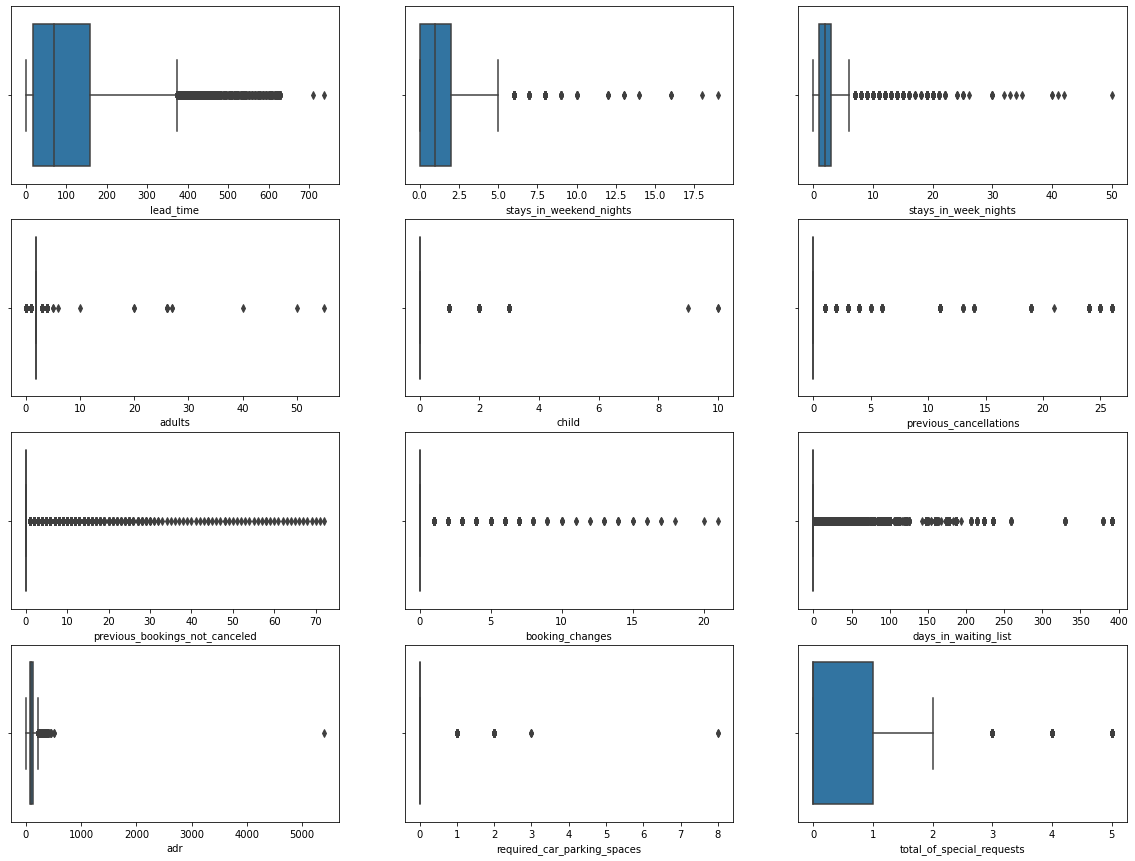

In [16]:
# Creating a list of columns that contain numerical data
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'child', 'previous_cancellations', 
           'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
           'required_car_parking_spaces', 'total_of_special_requests']

# Setting the display figure size
plt.figure(figsize=(20,15))

n = 1

# Creating boxplots for each of the column/features
for col in columns:
  plt.subplot(4,3,n)
  n = n+1
  sns.boxplot(hotel_booking[col])
  

### Let us handle the outliers in all these columns

In [17]:
# Setting a value of 400 to all the observations of 'lead_time' that are greater than 400
hotel_booking.loc[hotel_booking.lead_time > 400, 'lead_time'] = 400

# Setting a value of 5 to all the observations of 'stays_in_weekend_nights' that are greater than 5
hotel_booking.loc[hotel_booking.stays_in_weekend_nights > 5, 'stays_in_weekend_nights'] = 5

# Setting a value of 10 to all the observations of 'stays_in_week_nights' that are greater than 10
hotel_booking.loc[hotel_booking.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10

# Setting a value of 4 to all the observations of 'adults' that are greater than 4
hotel_booking.loc[hotel_booking.adults > 4, 'adults'] = 4

# Setting a value of 3 to all the observations of 'child' that are greater than 3
hotel_booking.loc[hotel_booking.child > 3, 'child'] = 3

# Setting a value of 1 to all the observations of 'previous_cancellations' that are greater than 0
hotel_booking.loc[hotel_booking.previous_cancellations > 0, 'previous_cancellations'] = 1

# Setting a value of 1 to all the observations of 'previous_bookings_not_canceled' that are greater than 0
hotel_booking.loc[hotel_booking.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1

# Setting a value of 5 to all the observations of 'booking_changes' that are greater than 5
hotel_booking.loc[hotel_booking.booking_changes > 5, 'booking_changes'] = 5

# Setting a value of 200 to all the observations of 'days_in_waiting_list' that are greater than 200
hotel_booking.loc[hotel_booking.days_in_waiting_list > 200, 'days_in_waiting_list'] = 200

# Setting a value of 500 to all the observations of 'adr' that are greater than 500
hotel_booking.loc[hotel_booking.adr > 500, 'adr'] = 500

# Setting a value of 3 to all the observations of 'required_car_parking_spaces' that are greater than 3
hotel_booking.loc[hotel_booking.required_car_parking_spaces > 3, 'required_car_parking_spaces'] = 3

# Setting a value of 3 to all the observations of 'total_of_special_requests' that are greater than 3
hotel_booking.loc[hotel_booking.total_of_special_requests > 3, 'total_of_special_requests'] = 3

## <b> Data Visualization and Exploration

### Now that we have cleaned our data by handling missing values and outliers, let us explore the data and gain some useful insights about it. I shall start by comparing number of bookings made in Resort Hotels vis-a-vis City Hotels

In [18]:
# Creating a copy of the cleaned dataset

df = hotel_booking.copy()

In [ ]:
# Finding the count of each hotel type

hotel_type = hotel_booking["hotel"].value_counts()
city_hotels = hotel_type[0]
resort_hotels = hotel_type[1]

# Printing the count of each hotel type

print("The number of bookings for City Hotels are: ", city_hotels)
print()
print("The number of bookings for Resort Hotels are: ", resort_hotels)


The number of bookings for City Hotels are:  79330

The number of bookings for Resort Hotels are:  40060


In [ ]:
# Finding the count of each hotel type

hotel_type = hotel_booking["hotel"].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

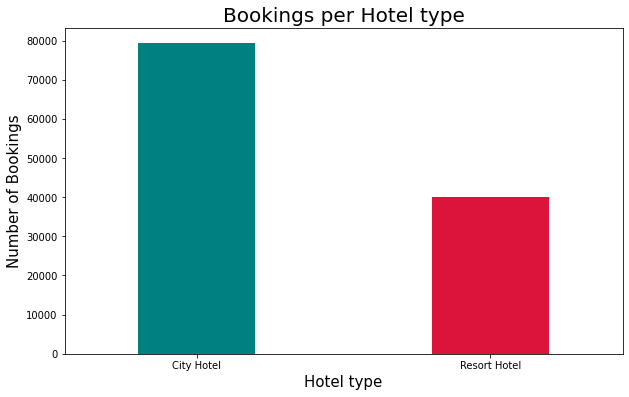

In [ ]:
# Bar plot to visualize bookings by hotel_type
hotel_type.plot.bar(width = 0.4, color = ['teal', 'crimson'])

# Giving title and labels to the plot
plt.title('Bookings per Hotel type', fontsize = 20)
plt.ylabel('Number of Bookings', fontsize = 15)
plt.xlabel('Hotel type', fontsize = 15)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The number of bookings in a City Hotel are roughly twice the number of bookings for Resort Hotel

### Next, let us visualize the number of confirmed bookings and cancelled bookings. 

In [ ]:
# Finding the count of booking cancellations

cancellation = hotel_booking['is_canceled'].value_counts()
cancellation

0    75166
1    44224
Name: is_canceled, dtype: int64

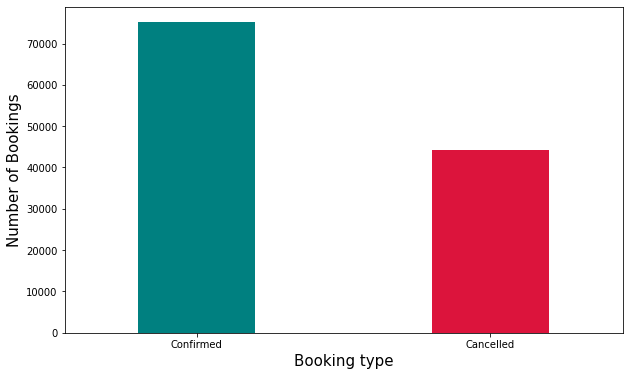

In [ ]:
# Bar plot to visualize confirmed bookings vs cancellations
cancellation.plot.bar(width = 0.4, color = ['teal', 'crimson'])

# Giving labels to the bar plot
plt.ylabel('Number of Bookings', fontsize = 15)
plt.xlabel('Booking type', fontsize = 15)
plt.xticks(hotel_booking['is_canceled'].unique(), labels = ['Confirmed', 'Cancelled'], rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


In [ ]:
# Normalizing the value count of 'is_canceled' data

hotel_booking.is_canceled.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

### While 62.96% of the bookings have been confirmed, 37.04% of the bookings have been cancelled
### Let us also check the cancellations vis-a-vis hotel type

In [ ]:
# Grouping the 'hotel' by type and whether the booking 'is_cancelled'

booking_cancelled = hotel_booking.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
booking_cancelled


is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


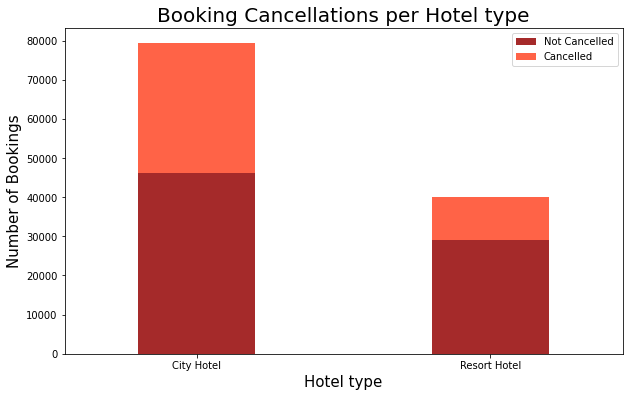

In [ ]:
# Stacked Bar plot to visualize booking cancellations by hotel_type
booking_cancelled.plot( kind='bar', stacked=True, width = 0.4, color=['brown', 'tomato'])

# Giving title, labels and legend to the plot
plt.title('Booking Cancellations per Hotel type', fontsize = 20)
plt.ylabel('Number of Bookings', fontsize = 15)
plt.xlabel('Hotel type', fontsize = 15)
plt.legend(['Not Cancelled', 'Cancelled'])
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### From the stacked bar plot, we can clearly infer that the proportion of cancellations were higher in City Hotels as compared to Resort Hotels.

### Now, let us explore lead time data.

In [ ]:
# Grouping the lead_time by hotel_type to find the mean lead_time (average time between booking and arrival) for each of the hotel types  

mean_lead_time = hotel_booking.groupby(['hotel'])['lead_time'].mean() # we are taking mean of price
mean_lead_time

hotel
City Hotel      108.054229
Resort Hotel     92.431503
Name: lead_time, dtype: float64

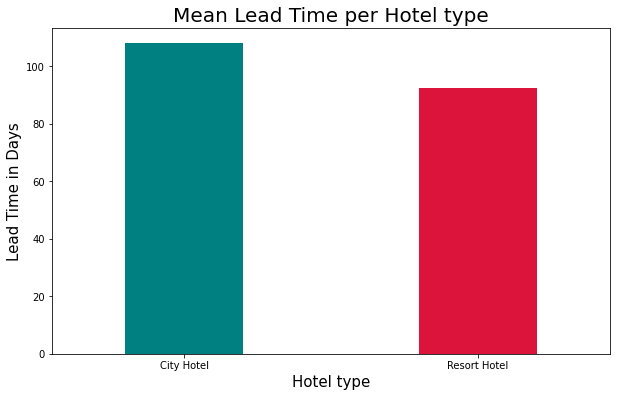

In [ ]:
# Bar plot to visualize mean lead time by hotel_type
mean_lead_time.plot.bar(width = 0.4, color = ['teal', 'crimson'])

# Giving title and labels to the plot
plt.title('Mean Lead Time per Hotel type', fontsize = 20)
plt.ylabel('Lead Time in Days', fontsize = 15)
plt.xlabel('Hotel type', fontsize = 15)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### We find that the mean lead time for City Hotels (108.05 days) is higher than that of the Resort Hotels (92.43 days). It implies that customers do comparitively more advance booking for City Hotels than Resort Hotels

### Next, let us check the details of the travel period

In [ ]:
# Grouping the 'hotel' by type and 'arrival_date_year'

booking_year = hotel_booking.groupby(['arrival_date_year','hotel'])['hotel'].count().unstack()
booking_year


hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,13682,8314
2016,38140,18567
2017,27508,13179


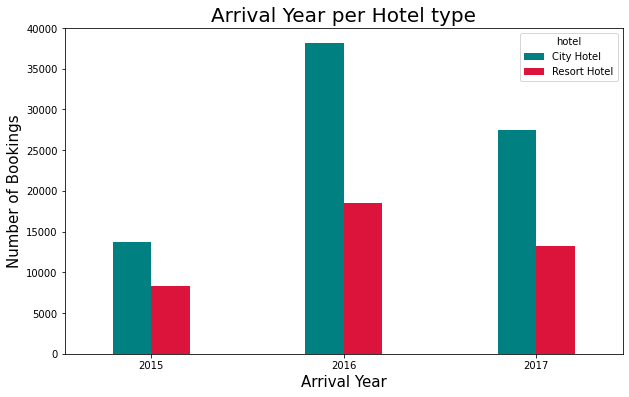

In [ ]:
# Bar plot to visualize 'arrival_date_year' by hotel_type
booking_year.plot.bar(width = 0.4, color=['teal', 'crimson'])

# Giving title and labels to the plot
plt.title('Arrival Year per Hotel type', fontsize = 20)
plt.ylabel('Number of Bookings', fontsize = 15)
plt.xlabel('Arrival Year', fontsize = 15)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### There were more guests in the year 2016 as compared to the other two years

### 2016 was the year in which two major sporting events were held- Summer Olympics and FIFA World Cup. This could explain the higher number of hotel bookings in 2016 as compared to the following year

In [19]:
# Giving an order of months
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Grouping the bookings by 'arrival_date_month' and sorting the index by months
booking_month = hotel_booking.groupby("arrival_date_month")["arrival_date_month"].count().reindex(months)

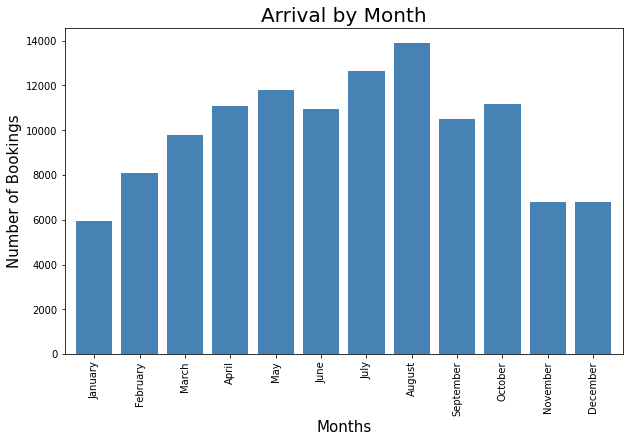

In [27]:
# Bar plot to visualize bookings by 'arrival_date_month' after sorting the order of months
booking_month.plot.bar(width = 0.8, color = ['steelblue'])

# Giving title and labels to the plot
plt.title('Arrival by Month', fontsize = 20)
plt.ylabel('Number of Bookings', fontsize = 15)
plt.xlabel('Months', fontsize = 15)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


### The highest number of hotel bookings is for the month of August, followed by July and May. 

### There are lower bookings for the period November - February

### We do not know the base location (country/region) of the Hotels in our dataset. Therefore, we cannot conclusively attribute any specific reasons for variation in bookings by month. But as pointed out earlier, Summer Olympics were held in August of 2016. This could be a plausible reason for high hotel bookings in the months of July and August



In [ ]:
# Grouping the bookings by 'arrival_date_day_of_month'

booking_date = hotel_booking.groupby('arrival_date_day_of_month')['arrival_date_day_of_month'].count()

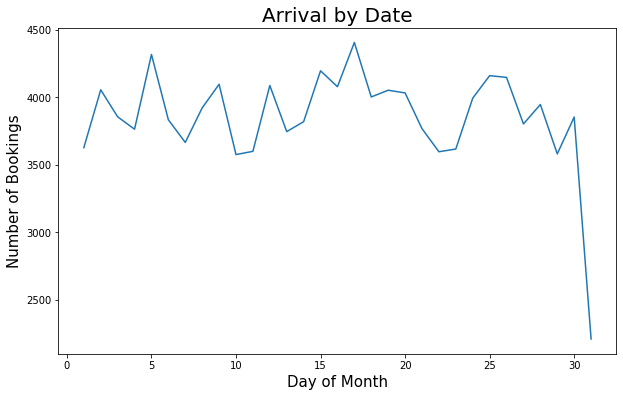

In [ ]:
# A simple line plot to visualize bookings by 'arrival_date_day_of_month'
booking_date.plot()

# Giving title and labels to the plot
plt.title('Arrival by Date', fontsize = 20)
plt.ylabel('Number of Bookings', fontsize = 15)
plt.xlabel('Day of Month', fontsize = 15)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

### It seems like the guests do not have any specific preference for travel dates in a month

### Now, let us find the country of origin of the guests

In [28]:
# Finding top 10 countries by number of guest bookings

# Finding the count for each of the unique values in 'country' column and arranging it in descending order
top_countries = hotel_booking['country'].value_counts().sort_values(ascending=False)[:10]

# Printing the list of top 5 countries
print("The top 5 Countries by number of guest bookings are: ", list(top_countries.index[0:5]))
print() 

# Printing the number of bookings made by guests of top 10 countries
top_countries


The top 5 Countries by number of guest bookings are:  ['PRT', 'GBR', 'FRA', 'ESP', 'DEU']



PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

<Figure size 720x432 with 0 Axes>

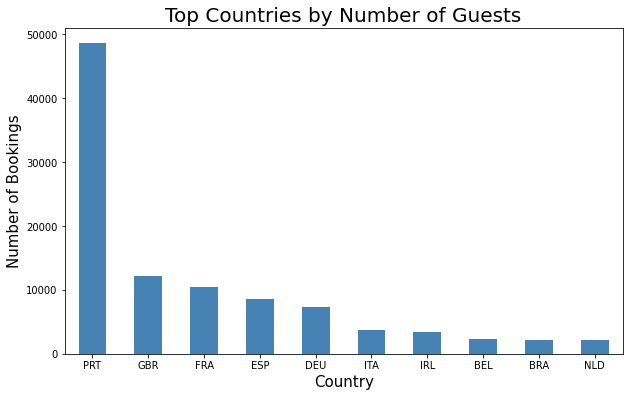

<Figure size 720x432 with 0 Axes>

In [39]:
# Bar plot to visualize number of bookings made by top 10 countries
top_countries.plot.bar(width = 0.5, color = ['steelblue'])

# Giving title and labels to the plot
plt.title('Top Countries by Number of Guests', fontsize = 20)
plt.ylabel('Number of Bookings', fontsize = 15)
plt.xlabel('Country', fontsize = 15)
plt.xticks(rotation = 'horizontal')

# Setting the display figure size
plt.figure(figsize=(10,6))


### The countries of origin of the highest number of guests' are:
### * Portugal [PRT]
### * Great Britain [GBR]
### * France [FRA]
### * Spain [ESP]
### * Germany [DEU]

### Let us check the type of hotel booked by the guests belonging to the top 10 countries (by booking)

<Figure size 720x432 with 0 Axes>

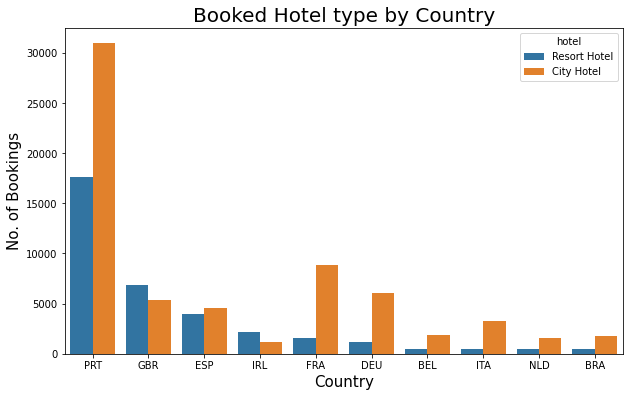

<Figure size 720x432 with 0 Axes>

In [38]:
# Bar plot to visualize type of hotel bookings made by guests belonging to top 10 countries
sns.countplot(x='country', hue='hotel', data=hotel_booking[hotel_booking['country'].isin(top_countries.index)])

# Giving title and labels to the plot
plt.xlabel("Country", fontsize = 15)
plt.ylabel("No. of Bookings", fontsize = 15)
plt.title("Booked Hotel type by Country", fontsize = 20)

# Setting the display figure size
plt.figure(figsize=(10,6))


### The general trend is that more guests prefered to book City Hotels rather than Resort Hotels.

### Among the top 10 countries by booking, only the guests belonging to Great Britain and Ireland have preferred to book Resort hotels over City Hotels

### Next, let us check bookings by Market Segment

In [40]:
# Finding the value count of the unique values in 'market_segment'

booking_market_segment = hotel_booking['market_segment'].value_counts()
booking_market_segment

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

<Figure size 2880x1440 with 0 Axes>

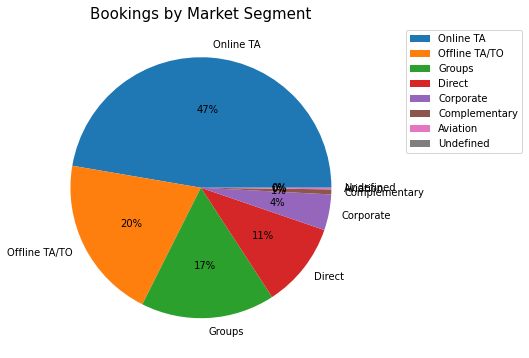

<Figure size 2880x1440 with 0 Axes>

In [66]:
# Plotting a Pie Chart to show bookings by various market segments
p = plt.pie(booking_market_segment, labels = booking_market_segment.index, autopct = "%.0f%%")

# Giving a title and legend to the plot
plt.title("Bookings by Market Segment", fontsize = 15)
plt.legend(loc ='top right', bbox_to_anchor = (1, 0, 0.5, 1))

# Setting the display figure size
plt.figure(figsize = (40,20))


### About half the number of total bookings by market segment are made by the Online Travel Agents

### The highest number of bookings by market segment are made through:

### * Online TA      (47%)
### * Offline TA/TO  (20%)
### * Groups         (17%)

### Together they constitute 84% of the total bookings

### Let us also check bookings by Distribution Channel

In [67]:
# Finding the value count of the unique values in 'distribution_channel'

booking_distribution_channel = hotel_booking['distribution_channel'].value_counts()
booking_distribution_channel

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

<Figure size 2880x1440 with 0 Axes>

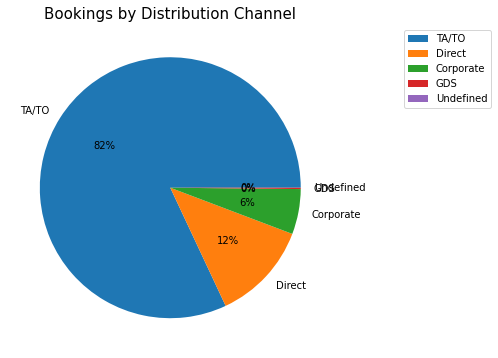

<Figure size 2880x1440 with 0 Axes>

In [68]:
# Plotting a Pie Chart to show bookings made through various distribution channels
p = plt.pie(booking_distribution_channel, labels = booking_distribution_channel.index, autopct = "%.0f%%")

# Giving a title and legend to the plot
plt.title("Bookings by Distribution Channel", fontsize = 15)
plt.legend(loc ='top right', bbox_to_anchor = (1, 0, 0.5, 1))

# Setting the display figure size
plt.figure(figsize = (40,20))


### Majority of bookings (82%) were done through the distribution channels of TA/TO (travel agents and tour operators).



### Let us see the quantum of bookings that have been made along with the provision of meals and the various meal types on offer.

In [69]:
# Finding the value count of the unique values in 'meal'

meal_type = hotel_booking['meal'].value_counts()
meal_type

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

<Figure size 2880x1440 with 0 Axes>

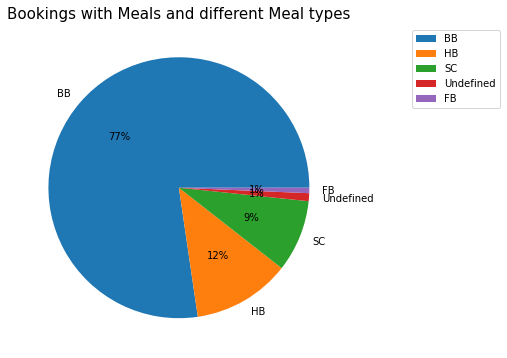

<Figure size 2880x1440 with 0 Axes>

In [70]:
# Plotting a Pie Chart to show bookings made along with the provision of meals
p = plt.pie(meal_type, labels = meal_type.index, autopct = "%.0f%%")

# Giving a title and legend to the plot
plt.title("Bookings with Meals and different Meal types", fontsize = 15)
plt.legend(loc ='top right', bbox_to_anchor = (1, 0, 0.5, 1))

# Setting the display figure size
plt.figure(figsize = (40,20))

### Majority of the guests (77%) have made their hotel bookings along with the BB (Bed and Breakfast) provision.

### Only 10% of the guests have not opted for meals (SC/ Undefined).




### Now let us analyse one of the most important parameters in the Hotel industry - the ADR (Average Daily Rate)

### ADR is a measure of the average rental revenue earned for an occupied room per day

In [71]:
# Checking the statistical values of the 'adr'

hotel_booking['adr'].describe()

count    119390.000000
mean        101.789929
std          48.165881
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max         500.000000
Name: adr, dtype: float64